#1.Data Analysis

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('/content/rspuramdata.csv')
df
#NaN - Not a Number

,area,bedroom,age,price
0,2200,3.0,20,8400000
1,2600,2.0,15,13000000
2,3000,4.0,14,15000000
3,3200,NaN,25,12000000
4,3600,3.0,10,19000000
5,4000,5.0,8,22000000


In [3]:
import math
bedroommedian=math.floor(df['bedroom'].median())
bedroommedian

3

In [4]:
df['bedroom']=df['bedroom'].fillna(bedroommedian)
df

,area,bedroom,age,price
0,2200,3.0,20,8400000
1,2600,2.0,15,13000000
2,3000,4.0,14,15000000
3,3200,3.0,25,12000000
4,3600,3.0,10,19000000
5,4000,5.0,8,22000000


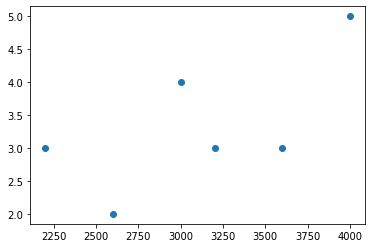

In [5]:
import matplotlib.pyplot as plt
plt.scatter(df['area'],df['bedroom'])

#Preaparing X and Y

In [6]:
X=df.drop('price',axis=1)
X

,area,bedroom,age
0,2200,3.0,20
1,2600,2.0,15
2,3000,4.0,14
3,3200,3.0,25
4,3600,3.0,10
5,4000,5.0,8


In [7]:
Y=df['price']
Y

0     8400000
1    13000000
2    15000000
3    12000000
4    19000000
5    22000000
Name: price, dtype: int64

#Machine Learning Part

In [8]:
#scikit learn
from sklearn import linear_model
#create a reference object to the linear model module
reg = linear_model.LinearRegression()
#we have to train the data
reg.fit(X,Y)

LinearRegression()

In [9]:
#Predict the output or testing the data
reg.predict([[900,2,5]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([7724316.07533284])

#Understanding the ML

In [11]:
m=reg.coef_
m

array([   5016.75865771,  -93941.40878468, -361541.60424894])

In [12]:
m=reg.coef_
m1=5016.75865771
m2=-93941.40878468
m3=-361541.60424894

In [13]:
b=reg.intercept_
b

5204824.122211814

In [14]:
y=(m1*900)+(m2*2)+(m3*5)+b
y

7724316.075336753

#Downloading the Model

In [15]:
import pickle
with open('rspuramhousingmodel','wb') as f:
  pickle.dump(reg,f)